# Student Dataset Assignment

Complete notebook implementing Q1 (subparts 0-5), Q2, and Q3.
Run cells sequentially; each sub-question prints/plots its output below the cell.

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')

## Q1.0 Dataset Generation
Generate 10,000 student records with specified distributions.

In [ ]:
#dataset
class StudentDataset:
    def __init__(self, num_students: int = 10000, seed: int = 42):
        self.num_students = num_students
        self.seed = seed
        np.random.seed(self.seed)
        self._df = self.assemble_dataframe()

    def get_full_dataframe(self) -> pd.DataFrame:
        return self._df

    def generate_gender(self):
        cats = ['Male','Female','Other']
        probs = [0.65,0.33,0.02]
        return np.random.choice(cats, size=self.num_students, p=probs).tolist()

    def generate_major(self):
        cats = ['B.Tech','MS','PhD']
        probs = [0.70,0.20,0.10]
        return np.random.choice(cats, size=self.num_students, p=probs).tolist()

    def generate_program(self, majors):
        programs = []
        for m in majors:
            if m == 'B.Tech':
                choices = ['CSE','ECE','CHD','CND']; probs = [0.4,0.4,0.1,0.1]
            elif m == 'MS':
                choices = ['CSE','ECE','CHD','CND']; probs = [0.3,0.3,0.2,0.2]
            else:
                choices = ['CSE','ECE','CHD','CND']; probs = [0.25,0.25,0.25,0.25]
            programs.append(np.random.choice(choices, p=probs))
        return programs

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            if m == 'B.Tech':
                val = np.random.normal(7.0,1.0)
            elif m == 'MS':
                val = np.random.normal(8.0,0.7)
            else:
                val = np.random.normal(8.3,0.5)
            gpas.append(float(np.clip(val, 4.0, 10.0)))
        return gpas

    def assemble_dataframe(self):
        gender = self.generate_gender()
        major = self.generate_major()
        program = self.generate_program(major)
        gpa = self.generate_gpa(major)
        df = pd.DataFrame({'Gender':gender, 'Major':major, 'Program':program, 'GPA':gpa})
        return df

ds = StudentDataset(num_students=10000, seed=42)
df = ds.get_full_dataframe()
print('shape:', df.shape)
df.head()

shape: (10000, 4)


,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,6.369308
1,Female,B.Tech,CSE,9.140309
2,Female,B.Tech,CSE,8.665679
3,Male,B.Tech,ECE,7.730935
4,Male,B.Tech,ECE,6.656924


### Q1.1 (a) Visualizations
Plot distributions and conditional summaries; outputs appear below each cell.

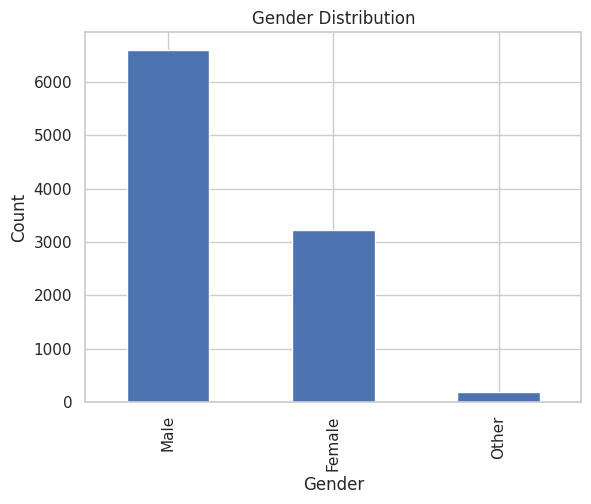

Gender
Male      6603
Female    3220
Other      177


In [ ]:
# plot gender distribution
counts = df['Gender'].value_counts()
counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print(counts.to_string())

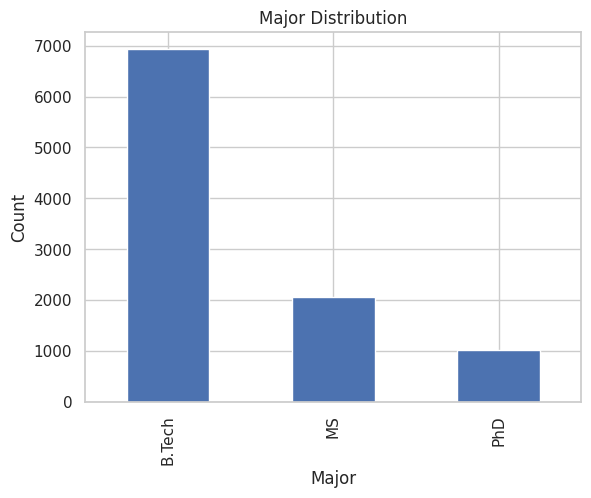

Major
B.Tech    6928
MS        2051
PhD       1021


In [ ]:
# plot major distribution
counts = df['Major'].value_counts()
counts.plot(kind='bar')
plt.title('Major Distribution')
plt.xlabel('Major')
plt.ylabel('Count')
plt.show()
print(counts.to_string())

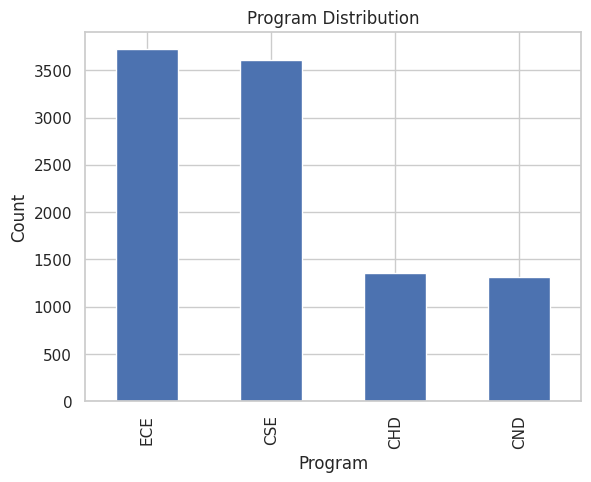

Program
ECE    3720
CSE    3610
CHD    1359
CND    1311


In [ ]:
# plot program distribution
counts = df['Program'].value_counts()
counts.plot(kind='bar')
plt.title('Program Distribution')
plt.xlabel('Program')
plt.ylabel('Count')
plt.show()
print(counts.to_string())

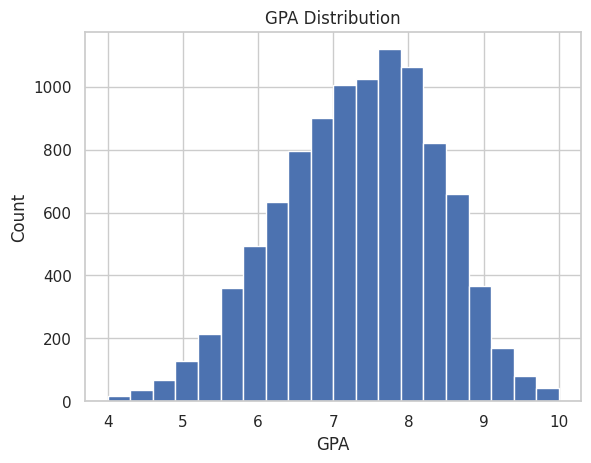

GPA min,max -> 4.0 10.0


In [ ]:
# plot gpa distribution
plt.hist(df['GPA'], bins=20)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()
print('GPA min,max ->', df['GPA'].min(), df['GPA'].max())

In [ ]:
# program conditioned on major (table)
table = pd.crosstab(df['Major'], df['Program'], normalize='index')*100
display(table.round(2))

Program,CHD,CND,CSE,ECE
Major,,,,
B.Tech,10.06,10.13,39.22,40.59
MS,18.97,18.38,30.86,31.79
PhD,26.74,22.72,25.47,25.07


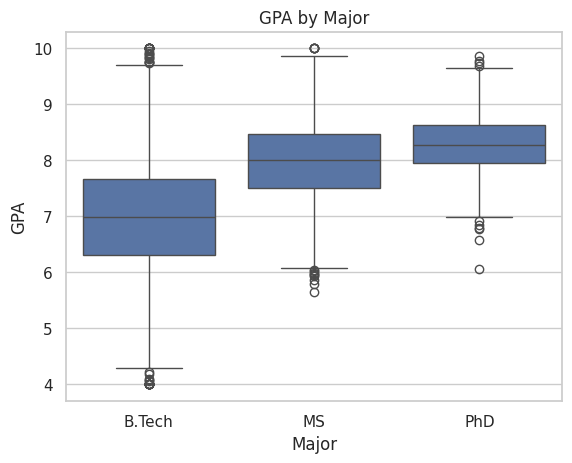

         count      mean       std       min       25%       50%       75%  \
Major                                                                        
B.Tech  6928.0  6.991036  0.998661  4.000000  6.307211  6.996335  7.675694   
MS      2051.0  8.008902  0.701858  5.642536  7.511337  8.016655  8.480229   
PhD     1021.0  8.287103  0.497990  6.067198  7.951690  8.281053  8.635739   

              max  
Major              
B.Tech  10.000000  
MS      10.000000  
PhD      9.866163  


In [ ]:
# GPA by major
sns.boxplot(x='Major', y='GPA', data=df)
plt.title('GPA by Major')
plt.show()
print(df.groupby('Major')['GPA'].describe())

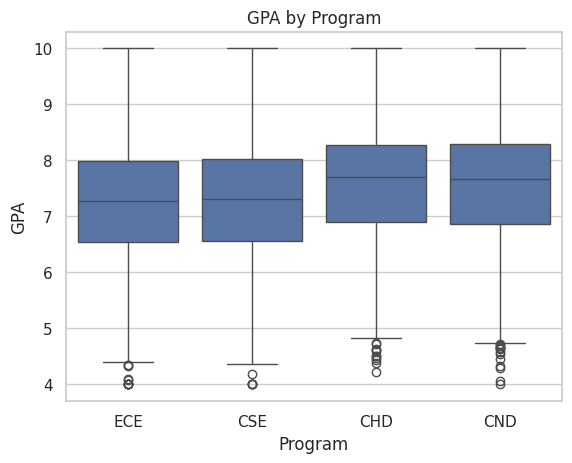

          count      mean       std       min       25%       50%       75%  \
Program                                                                       
CHD      1359.0  7.536016  1.032765  4.213852  6.897656  7.699310  8.282861   
CND      1311.0  7.515282  1.062370  4.000000  6.866376  7.660649  8.289018   
CSE      3610.0  7.272606  1.032478  4.000000  6.561004  7.314220  8.026755   
ECE      3720.0  7.250860  1.028735  4.000000  6.547599  7.270053  7.995701   

          max  
Program        
CHD      10.0  
CND      10.0  
CSE      10.0  
ECE      10.0  


In [ ]:
# GPA by program
sns.boxplot(x='Program', y='GPA', data=df)
plt.title('GPA by Program')
plt.show()
print(df.groupby('Program')['GPA'].describe())

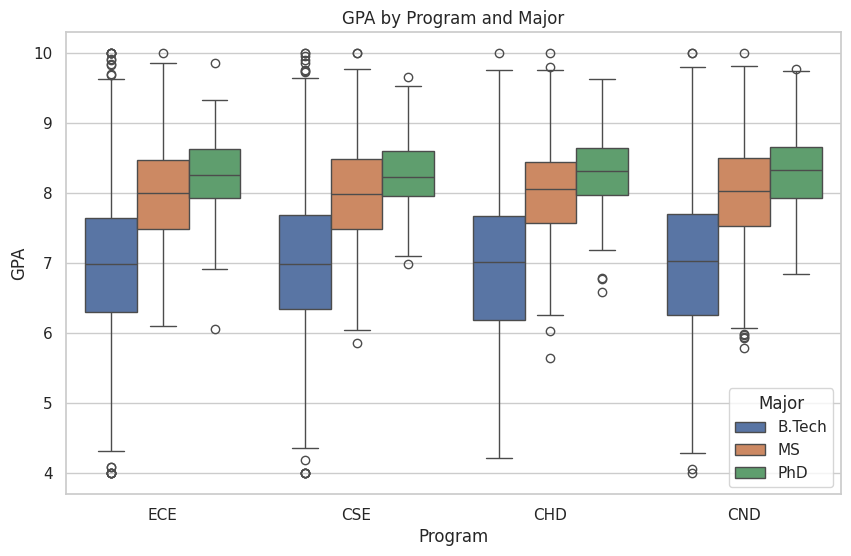

                 count      mean       std       min       25%       50%  \
Major  Program                                                             
B.Tech CHD       697.0  6.964388  1.022833  4.213852  6.189659  7.015423   
       CND       702.0  6.979613  1.050281  4.000000  6.257794  7.030946   
       CSE      2717.0  7.003885  0.991196  4.000000  6.351554  6.994811   
       ECE      2812.0  6.988077  0.986858  4.000000  6.306373  6.982184   
MS     CHD       389.0  8.029145  0.674097  5.642536  7.571850  8.060887   
       CND       377.0  8.026654  0.725337  5.788638  7.527803  8.029611   
       CSE       633.0  8.012531  0.699488  5.861277  7.484332  7.995127   
       ECE       652.0  7.983038  0.707391  6.099431  7.487320  8.007411   
PhD    CHD       273.0  8.292786  0.489972  6.586212  7.976353  8.311933   
       CND       232.0  8.305165  0.520797  6.843920  7.936000  8.325048   
       CSE       260.0  8.279308  0.494616  6.995050  7.963772  8.234518   
       ECE  

In [ ]:
# GPA by program and major
plt.figure(figsize=(10,6))
sns.boxplot(x='Program', y='GPA', hue='Major', data=df)
plt.title('GPA by Program and Major')
plt.show()
print(df.groupby(['Major','Program'])['GPA'].describe().head(12))

In [ ]:
# sample 100 rows
sample100 = df.sample(100, random_state=42)
display(sample100.reset_index(drop=True))

,Gender,Major,Program,GPA
0,Male,B.Tech,CND,7.333122
1,Female,MS,CSE,7.330278
2,Male,B.Tech,CND,8.606458
3,Male,MS,CSE,8.093611
4,Male,PhD,ECE,9.260031
...,...,...,...,...
95,Male,B.Tech,ECE,6.683920
96,Female,B.Tech,CSE,8.320807
97,Female,MS,CND,7.198484
98,Male,B.Tech,ECE,6.418610


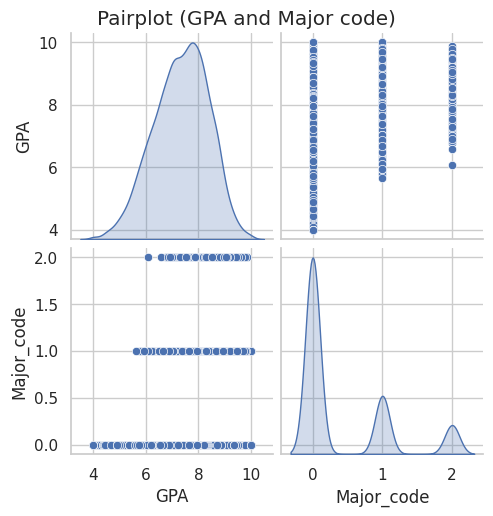

In [ ]:
# pairplot (GPA & Major code)
tmp = df.copy()
tmp['Major_code'] = tmp['Major'].map({'B.Tech':0,'MS':1,'PhD':2})
sns.pairplot(tmp[['GPA','Major_code']], diag_kind='kde')
plt.suptitle('Pairplot (GPA and Major code)', y=1.02)
plt.show()

### Q1.1 (b) GPA Summary Statistics

In [ ]:
# mean and std of GPA
mean_gpa = df['GPA'].mean()
std_gpa = df['GPA'].std()
print('Mean GPA:', round(mean_gpa,2))
print('Std GPA:', round(std_gpa,2))

Mean GPA: 7.33
Std GPA: 1.04


### Q1.1 (c) Program-Major combinations

Major    B.Tech   MS  PhD
Program                  
CHD         697  389  273
CND         702  377  232
CSE        2717  633  260
ECE        2812  652  256


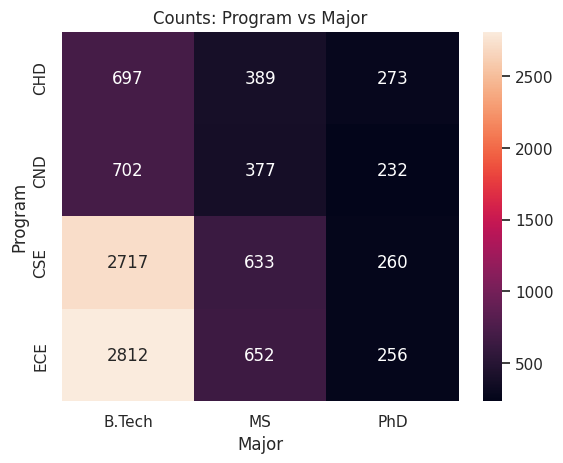

In [ ]:
# counts per (program,major) and heatmap
counts_pm = df.groupby(['Program','Major']).size().unstack(fill_value=0)
print(counts_pm)
sns.heatmap(counts_pm, annot=True, fmt='d')
plt.title('Counts: Program vs Major')
plt.xlabel('Major'); plt.ylabel('Program')
plt.show()

## Q1.2 Simple vs Stratified Sampling

In [ ]:
# random sampling repeated
def get_gpa_mean_std_random(df, n=500, repeats=50, seed=42):
    means = []
    for i in range(repeats):
        samp = df.sample(n, random_state=seed+i)
        means.append(samp['GPA'].mean())
    return float(np.mean(means)), float(np.std(means))

# stratified sampling by major
def get_gpa_mean_std_stratified(df, n=500, repeats=50, seed=42):
    means = []
    props = df['Major'].value_counts(normalize=True)
    for i in range(repeats):
        parts = []
        for maj, prop in props.items():
            k = int(round(prop * n))
            subset = df[df['Major']==maj].sample(k, random_state=seed+i)
            parts.append(subset)
        samp = pd.concat(parts)
        if len(samp) > n:
            samp = samp.sample(n, random_state=seed+i)
        elif len(samp) < n:
            extra = df.sample(n-len(samp), random_state=seed+i)
            samp = pd.concat([samp, extra])
        means.append(samp['GPA'].mean())
    return float(np.mean(means)), float(np.std(means))

r_mean, r_std = get_gpa_mean_std_random(df)
s_mean, s_std = get_gpa_mean_std_stratified(df)
print('Random sampling mean of means:', round(r_mean,4), 'std of means:', round(r_std,4))
print('Stratified sampling mean of means:', round(s_mean,4), 'std of means:', round(s_std,4))

Random sampling mean of means: 7.317 std of means: 0.0436
Stratified sampling mean of means: 7.3463 std of means: 0.0408


## Q1.3 Gender-Balanced Cohort

In [ ]:
# exact balance sampling
def get_gender_balanced_counts(df, n=300, repeats=5, seed=42):
    results = []
    per = n // 3
    for i in range(repeats):
        parts = []
        for g in ['Male','Female','Other']:
            parts.append(df[df['Gender']==g].sample(per, random_state=seed+i))
        samp = pd.concat(parts)
        results.append(dict(samp['Gender'].value_counts()))
    return results

# strategy A sampling
def sample_gender_uniform_random(df, n=300, repeats=5, seed=42):
    results = []
    cats = ['Male','Female','Other']
    for i in range(repeats):
        picks = []
        for _ in range(n):
            choice = np.random.choice(cats)
            sel = df[df['Gender']==choice].sample(1, random_state=seed+i+_)
            picks.append(sel)
        samp = pd.concat(picks)
        results.append(dict(samp['Gender'].value_counts()))
    return results

exact = get_gender_balanced_counts(df)
strategyA = sample_gender_uniform_random(df)
print('Exact balance samples:')
for s in exact:
    print(s)
print('\nStrategy A samples:')
for s in strategyA:
    print(s)

Exact balance samples:
{'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
{'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
{'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
{'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}
{'Male': np.int64(100), 'Female': np.int64(100), 'Other': np.int64(100)}

Strategy A samples:
{'Female': np.int64(112), 'Other': np.int64(104), 'Male': np.int64(84)}
{'Male': np.int64(107), 'Female': np.int64(107), 'Other': np.int64(86)}
{'Female': np.int64(101), 'Other': np.int64(101), 'Male': np.int64(98)}
{'Other': np.int64(118), 'Male': np.int64(92), 'Female': np.int64(90)}
{'Female': np.int64(109), 'Male': np.int64(98), 'Other': np.int64(93)}


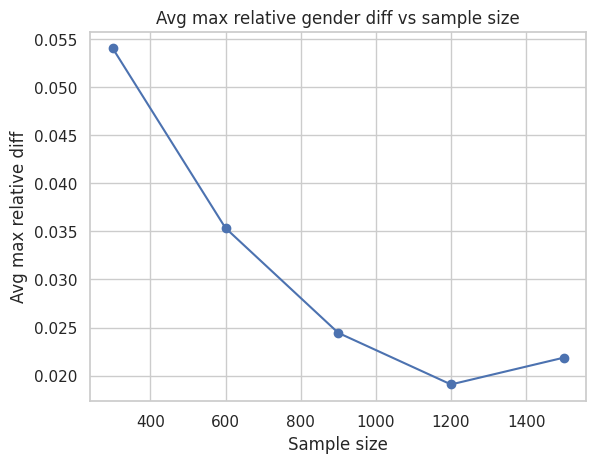

[(300, np.float64(0.054)), (600, np.float64(0.0353)), (900, np.float64(0.0244)), (1200, np.float64(0.0191)), (1500, np.float64(0.0219))]


In [ ]:
# avg max relative diff vs sample size
def avg_max_rel_vs_size(df, sample_sizes=[300,600,900,1200,1500], repeats=10, seed=42):
    avg_vals = []
    cats = ['Male','Female','Other']
    for n in sample_sizes:
        vals = []
        for r in range(repeats):
            picks = []
            for _ in range(n):
                choice = np.random.choice(cats)
                sel = df[df['Gender']==choice].sample(1, random_state=seed+r+_)
                picks.append(sel)
            samp = pd.concat(picks)
            counts = samp['Gender'].value_counts()
            mx = counts.max(); mn = counts.min()
            vals.append((mx-mn)/n)
        avg_vals.append(np.mean(vals))
    return sample_sizes, avg_vals

sizes, avg_vals = avg_max_rel_vs_size(df)
plt.plot(sizes, avg_vals, marker='o')
plt.title('Avg max relative gender diff vs sample size')
plt.xlabel('Sample size'); plt.ylabel('Avg max relative diff')
plt.show()
print(list(zip(sizes, [round(v,4) for v in avg_vals])))

## Q1.4 GPA-Uniform Cohort

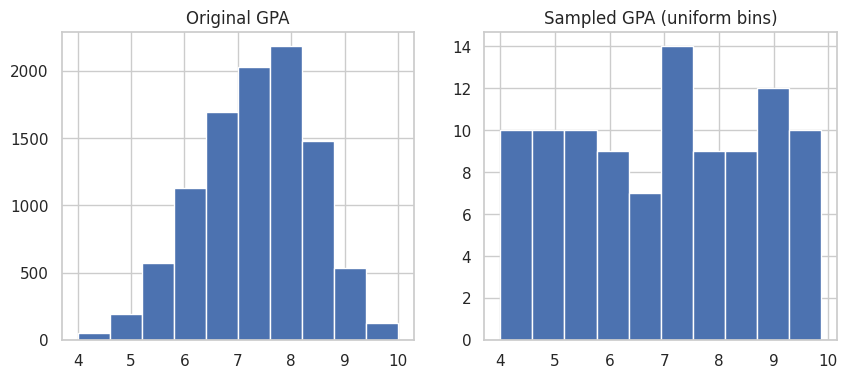

sampled size: 100


In [ ]:
# sample GPA uniformly across bins
def sample_gpa_uniform(df, n=100, bins=10, seed=42):
    tmp = df.copy()
    tmp['gpa_bin'] = pd.cut(tmp['GPA'], bins=bins, labels=False)
    per_bin = n // bins
    parts = []
    for b in range(bins):
        subset = tmp[tmp['gpa_bin']==b]
        if len(subset) >= per_bin:
            parts.append(subset.sample(per_bin, random_state=seed+b))
        else:
            parts.append(subset.sample(per_bin, replace=True, random_state=seed+b))
    samp = pd.concat(parts).sample(n, random_state=seed)
    return samp.drop(columns=['gpa_bin'])

sampled_gpa = sample_gpa_uniform(df)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['GPA'], bins=10)
plt.title('Original GPA')
plt.subplot(1,2,2)
plt.hist(sampled_gpa['GPA'], bins=10)
plt.title('Sampled GPA (uniform bins)')
plt.show()
print('sampled size:', len(sampled_gpa))

## Q1.5 Program-Major Balanced Cohort

sampled counts:
Major    B.Tech  MS  PhD
Program                 
CHD           5   5    5
CND           5   5    5
CSE           5   5    5
ECE           5   5    5


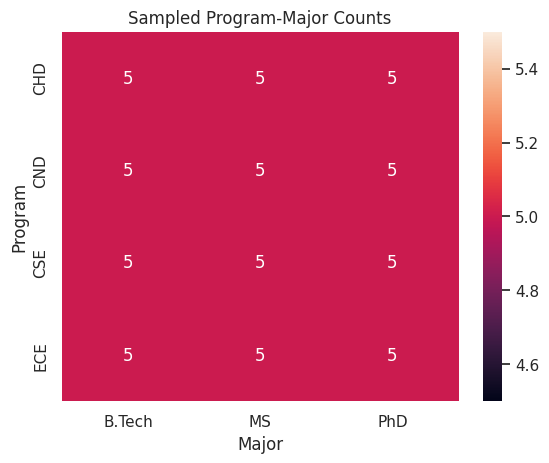

In [ ]:
# sample program-major balanced
def sample_program_major_balanced(df, n=60, seed=42):
    combos = df.groupby(['Program','Major']).size().reset_index(name='count')
    k = len(combos)
    per = n // k if k>0 else 0
    parts = []
    for _, row in combos.iterrows():
        subset = df[(df['Program']==row['Program']) & (df['Major']==row['Major'])]
        if len(subset) >= per and per>0:
            parts.append(subset.sample(per, random_state=seed+hash((row['Program'],row['Major']))%1000))
        elif per>0:
            parts.append(subset.sample(per, replace=True, random_state=seed+hash((row['Program'],row['Major']))%1000))
    samp = pd.concat(parts) if parts else df.sample(n, random_state=seed)
    if len(samp) < n:
        extra = df.sample(n-len(samp), random_state=seed)
        samp = pd.concat([samp, extra])
    return samp.head(n)

sampled_pm = sample_program_major_balanced(df)
print('sampled counts:')
print(sampled_pm.groupby(['Program','Major']).size().unstack(fill_value=0))
sns.heatmap(sampled_pm.groupby(['Program','Major']).size().unstack(fill_value=0), annot=True, fmt='d')
plt.title('Sampled Program-Major Counts')
plt.show()

## Q2.0 k-Nearest Neighbors - full experiments

Best k (euclidean) by F1 on val: 3


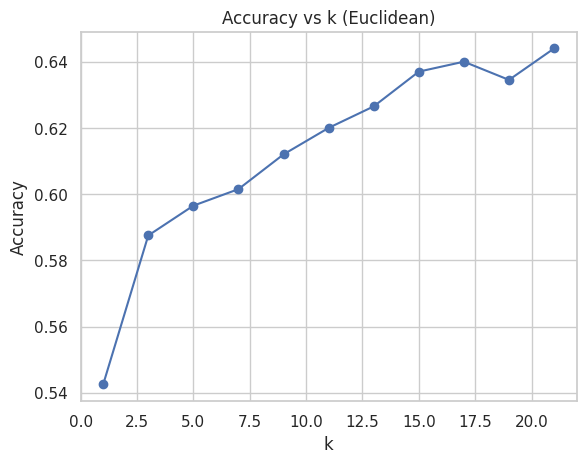

,euclidean,manhattan,cosine
1,0.543,0.543,0.545
3,0.566,0.566,0.566
5,0.560,0.560,0.561
7,0.555,0.555,0.555
9,0.556,0.556,0.556
11,0.557,0.557,0.556
13,0.558,0.558,0.557
15,0.561,0.561,0.561
17,0.551,0.551,0.553
19,0.540,0.540,0.543


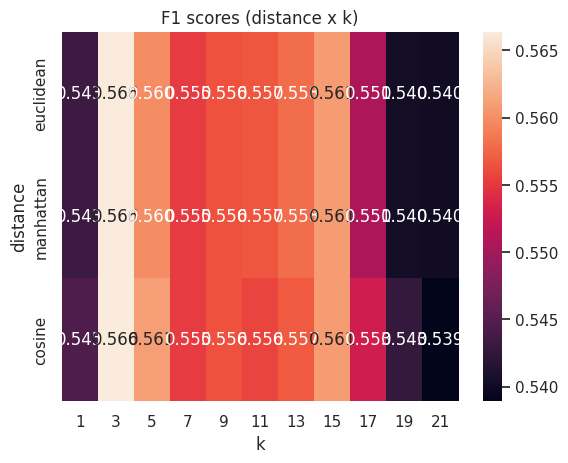

Test Accuracy: 0.581
Test F1 (weighted): 0.56


In [ ]:
# prepare features per feature transformer style (inline simple)
def prepare_feature_matrix(df, features):
    parts = []
    for f in features:
        if df[f].dtype == 'O' or str(df[f].dtype).startswith('category'):
            enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # fixed param
            parts.append(enc.fit_transform(df[[f]]))
        else:
            scaler = StandardScaler()
            parts.append(scaler.fit_transform(df[[f]]))
    return np.hstack(parts)

# split dataset
full_features = ['Major','Program','GPA']
X = prepare_feature_matrix(df, full_features)
y = df['Gender'].values
X_trval, X_test, y_trval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trval, y_trval, test_size=0.25, random_state=42, stratify=y_trval)  # 60/20/20

# vary k and distances
k_values = list(range(1,22,2))
distances = ['euclidean','manhattan','cosine']
acc_results = {d:[] for d in distances}
f1_results = {d:[] for d in distances}

for dist in distances:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_val)
        acc_results[dist].append(accuracy_score(y_val, pred))
        f1_results[dist].append(f1_score(y_val, pred, average='weighted'))

# best k for euclidean by f1
best_k_euc = k_values[int(np.argmax(f1_results['euclidean']))]
print('Best k (euclidean) by F1 on val:', best_k_euc)

# plot accuracy vs k for euclidean
plt.plot(k_values, acc_results['euclidean'], marker='o')
plt.title('Accuracy vs k (Euclidean)'); plt.xlabel('k'); plt.ylabel('Accuracy'); plt.show()

# f1 heatmap table
f1_df = pd.DataFrame({d: f1_results[d] for d in distances}, index=k_values)
display(f1_df.round(3))
sns.heatmap(f1_df.T, annot=True, fmt='.3f')
plt.title('F1 scores (distance x k)'); plt.xlabel('k'); plt.ylabel('distance'); plt.show()

# choose best k from val (euclidean) and evaluate on test
best_k = k_values[int(np.argmax(f1_results['euclidean']))]
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)
pred_test = knn_best.predict(X_test)
print('Test Accuracy:', round(accuracy_score(y_test, pred_test),3))
print('Test F1 (weighted):', round(f1_score(y_test, pred_test, average='weighted'),3))


In [ ]:
# single feature F1 table
def single_feature_f1_table(df, features, k_values=[1,3,5,7,9]):
    rows = []
    for k in k_values:
        row = {}
        for feat in features:
            X_feat = prepare_feature_matrix(df, [feat])
            X_tr, X_te, y_tr, y_te = train_test_split(X_feat, df['Gender'].values, test_size=0.2, random_state=42, stratify=df['Gender'])
            knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
            knn.fit(X_tr, y_tr)
            pred = knn.predict(X_te)
            row[feat] = f1_score(y_te, pred, average='weighted')
        rows.append(row)
    return pd.DataFrame(rows, index=k_values)

single_table = single_feature_f1_table(df, ['GPA','Major','Program'])
display(single_table.round(3))

,GPA,Major,Program
1,0.538,0.438,0.543
3,0.541,0.438,0.549
5,0.543,0.438,0.549
7,0.548,0.438,0.525
9,0.551,0.438,0.552


## Q3.0 Polynomial Regression with Regularization
Fit poly models degree 1-6 for no reg, L1, L2; choose best via val MSE.

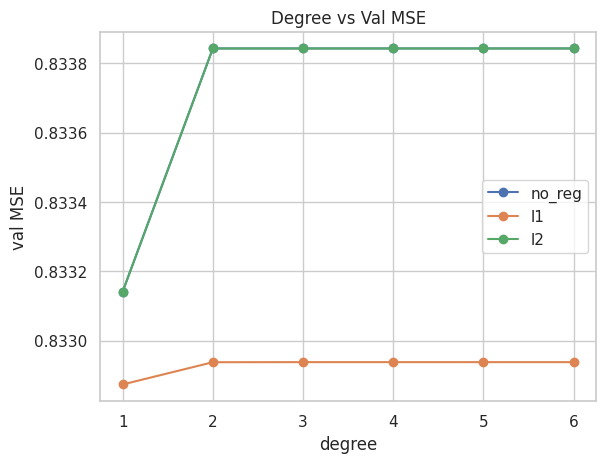

Best setup: ('l1', 1, 0.001) val_mse: 0.8328733011170958
Test MSE (best setup): 0.8197250512516676
L1 non-zero count: 3
L2 non-zero count: 5


In [ ]:
# prepare regression data
X_reg = pd.get_dummies(df[['Major','Program']], drop_first=True)
y_reg = df['GPA']

# splits 60/20/20
X_trval, X_test_reg, y_trval, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_trval, y_trval, test_size=0.25, random_state=42)

degrees = range(1,7)
results = {'no_reg':{}, 'l1':{}, 'l2':{}}

alphas = [0.001,0.01,0.1,1.0]
for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    Xtr = poly.fit_transform(X_train_reg)
    Xv = poly.transform(X_val_reg)
    Xt = poly.transform(X_test_reg)
    # no regularization
    lr = LinearRegression().fit(Xtr, y_train_reg)
    results['no_reg'][deg] = {'train_mse': np.mean((lr.predict(Xtr)-y_train_reg)**2),
                              'val_mse': np.mean((lr.predict(Xv)-y_val_reg)**2)}
    # L2 search
    best_l2_mse = np.inf; best_l2_a = None; best_l2_model = None
    for a in alphas:
        m = Ridge(alpha=a).fit(Xtr, y_train_reg)
        mse = np.mean((m.predict(Xv)-y_val_reg)**2)
        if mse < best_l2_mse:
            best_l2_mse = mse; best_l2_a = a; best_l2_model = m
    results['l2'][deg] = {'best_alpha': best_l2_a, 'train_mse': np.mean((best_l2_model.predict(Xtr)-y_train_reg)**2),
                          'val_mse': best_l2_mse}
    # L1 search
    best_l1_mse = np.inf; best_l1_a = None; best_l1_model = None
    for a in alphas:
        m = Lasso(alpha=a, max_iter=10000).fit(Xtr, y_train_reg)
        mse = np.mean((m.predict(Xv)-y_val_reg)**2)
        if mse < best_l1_mse:
            best_l1_mse = mse; best_l1_a = a; best_l1_model = m
    results['l1'][deg] = {'best_alpha': best_l1_a, 'train_mse': np.mean((best_l1_model.predict(Xtr)-y_train_reg)**2),
                          'val_mse': best_l1_mse}

# plot degree vs val mse
plt.plot(list(degrees), [results['no_reg'][d]['val_mse'] for d in degrees], label='no_reg', marker='o')
plt.plot(list(degrees), [results['l1'][d]['val_mse'] for d in degrees], label='l1', marker='o')
plt.plot(list(degrees), [results['l2'][d]['val_mse'] for d in degrees], label='l2', marker='o')
plt.xlabel('degree'); plt.ylabel('val MSE'); plt.title('Degree vs Val MSE'); plt.legend(); plt.show()

# find best overall setup
best_setup = None; best_mse = np.inf
for setup in results:
    for d in results[setup]:
        vm = results[setup][d]['val_mse']
        if vm < best_mse:
            best_mse = vm; best_setup = (setup, d, results[setup][d].get('best_alpha', None))
print('Best setup:', best_setup, 'val_mse:', best_mse)

# retrain best on train+val and report test mse
best_setup_name, best_deg, best_alpha = best_setup
poly = PolynomialFeatures(degree=best_deg, include_bias=False)
X_trval_poly = poly.fit_transform(X_trval)
X_test_poly = poly.transform(X_test_reg)
if best_setup_name == 'no_reg':
    model = LinearRegression().fit(X_trval_poly, y_trval)
elif best_setup_name == 'l2':
    model = Ridge(alpha=best_alpha).fit(X_trval_poly, y_trval)
else:
    model = Lasso(alpha=best_alpha, max_iter=10000).fit(X_trval_poly, y_trval)
test_mse = np.mean((model.predict(X_test_poly)-y_test_reg)**2)
print('Test MSE (best setup):', test_mse)

# show non-zero features for L1 and L2 at best degree
poly = PolynomialFeatures(degree=best_deg, include_bias=False)
Xtr = poly.fit_transform(X_train_reg)
l1 = Lasso(alpha=results['l1'][best_deg]['best_alpha'], max_iter=10000).fit(Xtr, y_train_reg)
l2 = Ridge(alpha=results['l2'][best_deg]['best_alpha']).fit(Xtr, y_train_reg)
coef_l1 = l1.coef_
coef_l2 = l2.coef_
print('L1 non-zero count:', int(np.sum(coef_l1!=0)))
print('L2 non-zero count:', int(np.sum(coef_l2!=0)))